<a href="https://colab.research.google.com/github/mohameds277/Machine_learning/blob/main/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Unsupervised* Learning


# 1- Data Generation

In [83]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [84]:
# Generate a Gaussian 2D dataset (blobs)
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)


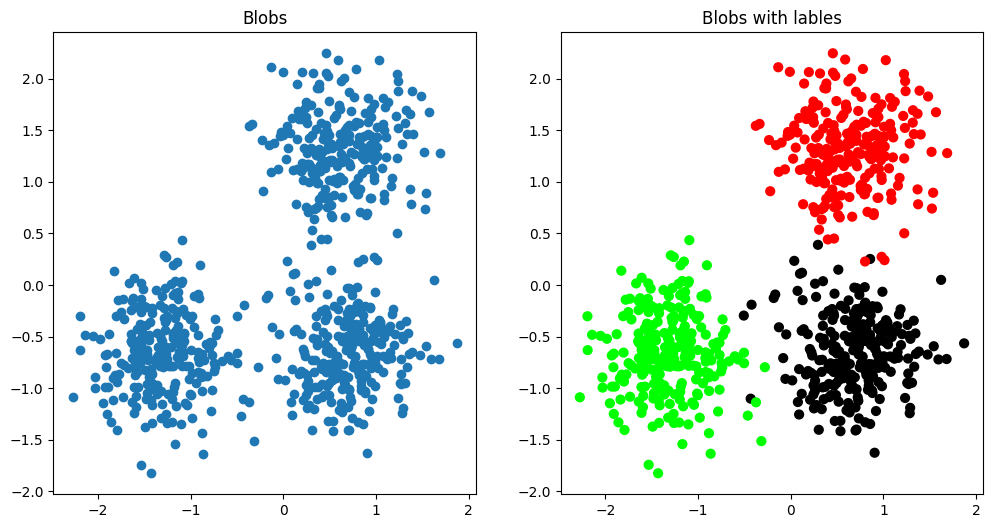

In [85]:
# data visualization


import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs without lables
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Blobs')
#plt.show()
# Plot the blobs with lables (Ground Truth (GT)). We will use it for
#clustering results evaluation
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with lables')
plt.show()


# 2 - Compute KMeans

In [86]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Use K = 3
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


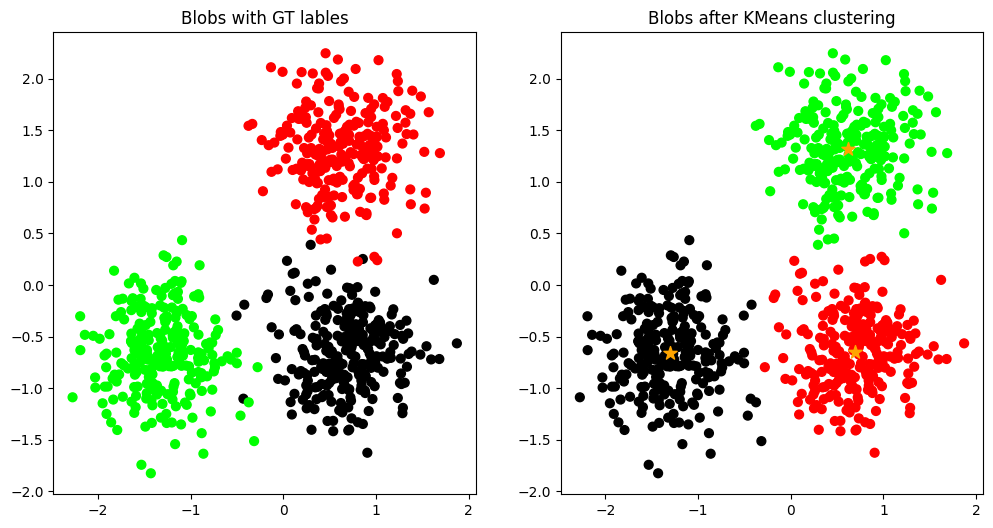

In [88]:
# visulisation

plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY],s=40)
plt.title('Blobs after KMeans clustering')
# We will also get the coordinates of the cluster centers using KMeans
#.cluster_centers_ and save it as k_means_cluster_centers.
k_means_cluster_centers = model.cluster_centers_
# define the centroid, or cluster center.
cluster_centers = k_means_cluster_centers
#print(cluster_center)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*',
c='orange',s=100)

# 3 - *Compute DBSCAN*

In [91]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X) # Params for blobs data
# db = DBSCAN(eps=0.15, min_samples=5).fit(X) # Params for two moons data
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


Text(0.5, 1.0, 'DBSCAN estimated number of clusters: 3')

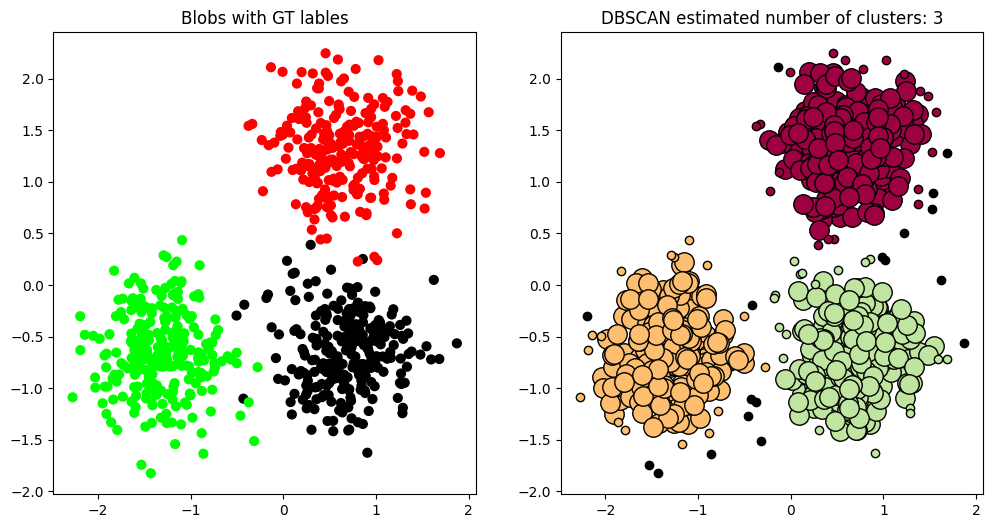

In [92]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')


# Plot the blobs after DBSCAN clustering. I used a different
#visualization/plot to show the core points and the noisy points in
#different color and size
plt.subplot(1,2,2)
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1,len(unique_labels))]

for k, col in zip(unique_labels, colors):
  if k == -1:
# Black used for noise.
    col = [0, 0, 0, 1]
  class_member_mask = labels == k
  xy = X[class_member_mask & core_samples_mask]
  plt.plot(
  xy[:, 0],
  xy[:, 1],
  "o",
  markerfacecolor=tuple(col),
  markeredgecolor="k",
  markersize=14,
  )
  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(
  xy[:, 0],
  xy[:, 1],
  "o",
  markerfacecolor=tuple(col),
  markeredgecolor="k",
  markersize=6,
  )
plt.title(f"DBSCAN estimated number of clusters: {n_clusters_}")

#Compute Gaussian Mixture Model (GMM)


In [48]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(X)
y_cluster_gmm=gmm.predict(X)

Text(0.5, 1.0, 'Blobs after GMMs clustering')

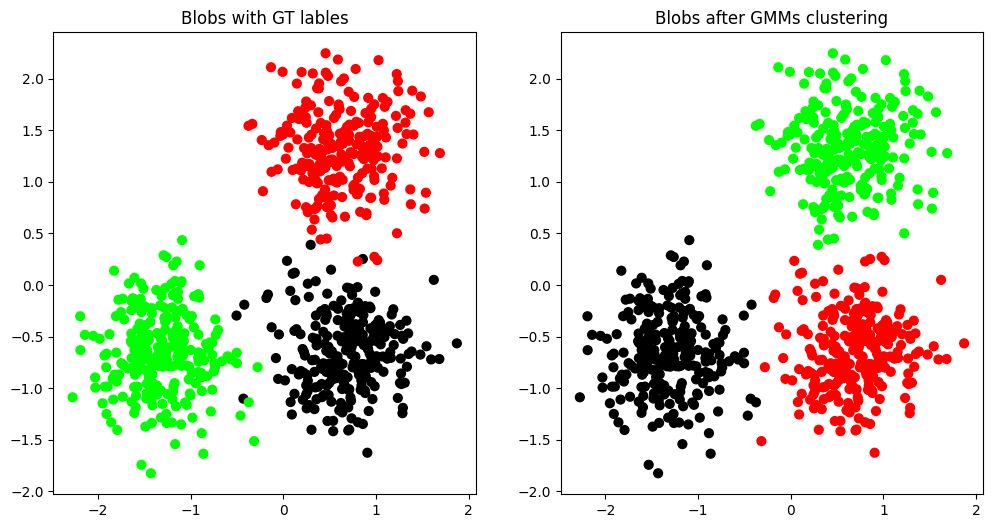

In [49]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[y_cluster_gmm],s=40)
plt.title('Blobs after GMMs clustering')


# Quantitative results comparison of the clustering methods using evaluation measures

In [93]:
from sklearn import metrics

print(f"---------------------------")
print(f"DBSCAN Evaluation measures\n")


print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")

print(f"Completeness: {metrics.completeness_score(labels_true,labels):.3f}")

print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")

print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")

print(
"Adjusted Mutual Information:"
f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
print(f"\n---------------------------")
print(f"K-Means Evaluation measures\n")
11
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, predY):.3f} ")
print(f"Completeness: {metrics.completeness_score(labels_true,predY):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, predY):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,predY):.3f}")
print("Adjusted Mutual Information:"f" {metrics.adjusted_mutual_info_score(labels_true, predY):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, predY):.3f}")
print(f"\n---------------------------")
print(f"GMMs Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true,y_cluster_gmm):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true,y_cluster_gmm):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true,y_cluster_gmm):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true,y_cluster_gmm):.3f}")
print("Adjusted Mutual Information:"f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X,y_cluster_gmm):.3f}")


---------------------------
DBSCAN Evaluation measures

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626

---------------------------
K-Means Evaluation measures

Homogeneity: 0.945 
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650

---------------------------
GMMs Evaluation measures

Homogeneity: 0.939
Completeness: 0.939
V-measure: 0.939
Adjusted Rand Index: 0.964
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.650


# To DO

**1 - Repeat the above procedure by generating two moons of data. Compare the
performance of the clustering algorithms, qualitatively and quantitatively, when
applied to the blobs dataset and two moons datasets. Use the below code to
generate the two moons dataset.**

# 1 - Data Generation

In [94]:
# Note : 2 moons of data means 2 cresent-shaped clusteres , where each cluster presents a cresent and these 2 cresents are joined forming a full shallow moon

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt


X, labels_true = make_moons(n_samples=500, noise=0.1)

*K = 2 for KMeans and ϵ = 0.15, min samples = 5 for the
DBSCAN algorithm.*

# K-mean

In [95]:
model=KMeans(n_clusters=2)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


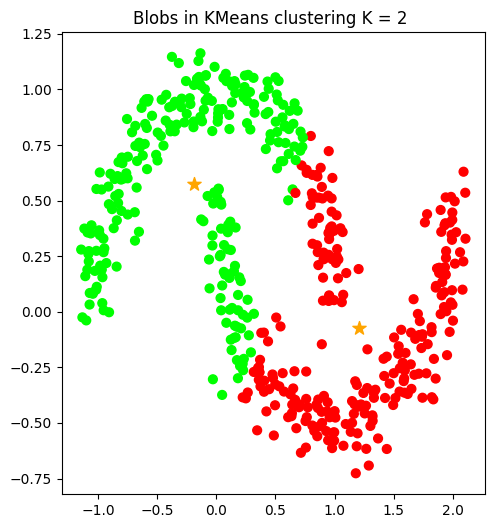

In [96]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY],s=40)
plt.title('Blobs in KMeans clustering K = 2 ')
# We will also get the coordinates of the cluster centers using KMeans
#.cluster_centers_ and save it as k_means_cluster_centers.
k_means_cluster_centers = model.cluster_centers_
# define the centroid, or cluster center.
cluster_centers = k_means_cluster_centers
#print(cluster_center)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*',
c='orange',s=100)




# DBSCAN

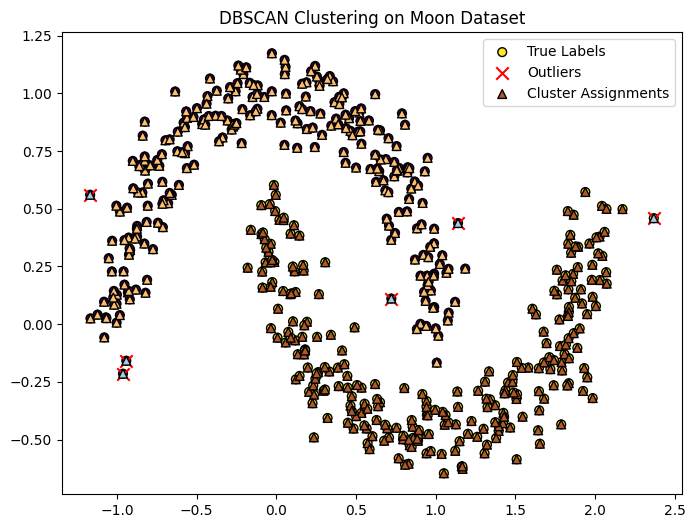

Homogeneity Score: 0.9921997309402204
Completeness Score: 0.9172331787314265
V-Measure Score: 0.9532448179111618



In [74]:
# Apply DBSCAN algorithm
epsilon = 0.15
min_samples = 5

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels_pred = dbscan.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))

# Plot the original dataset
plt.scatter(X[:, 0], X[:, 1], c=labels_true, cmap='viridis', edgecolors='k', s=40, marker='o', label='True Labels')

# Highlight the outliers (cluster with label -1)
outliers = labels_pred == -1
plt.scatter(X[outliers, 0], X[outliers, 1], c='r', marker='x', s=80, label='Outliers')

# Plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=labels_pred, cmap='Paired', edgecolors='k', s=40, marker='^', label='Cluster Assignments')

plt.title('DBSCAN Clustering on Moon Dataset')
plt.legend()
plt.show()

from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score


homogeneity = homogeneity_score(labels_true, labels_pred)
completeness = completeness_score(labels_true, labels_pred)
v_measure = v_measure_score(labels_true, labels_pred)

print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-Measure Score: {v_measure}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


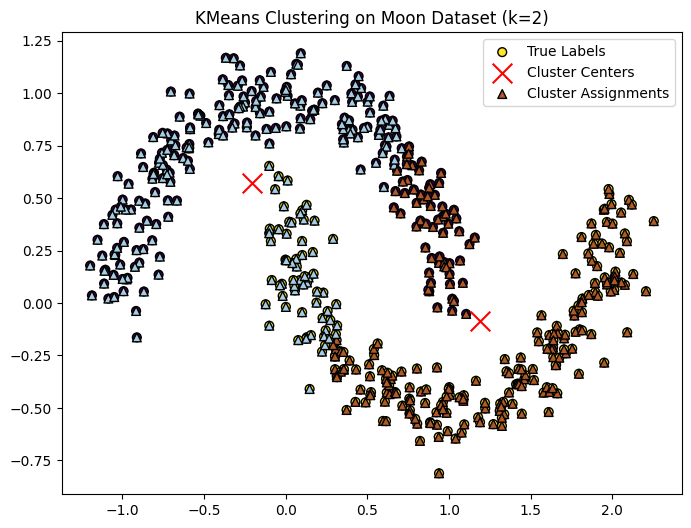

Homogeneity Score: 0.19512751600381076
Completeness Score: 0.1951297681118067
V-Measure Score: 0.19512864205131047



In [70]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate moon dataset
X, labels_true = make_moons(n_samples=500, noise=0.1)

# Apply KMeans algorithm
k = 2

kmeans = KMeans(n_clusters=k)
labels_pred = kmeans.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))

# Plot the original dataset
plt.scatter(X[:, 0], X[:, 1], c=labels_true, cmap='viridis', edgecolors='k', s=40, marker='o', label='True Labels')

# Plot the cluster assignments
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.scatter(X[:, 0], X[:, 1], c=labels_pred, cmap='Paired', edgecolors='k', s=40, marker='^', label='Cluster Assignments')

plt.title('KMeans Clustering on Moon Dataset (k=2)')
plt.legend()
plt.show()


homogeneity = homogeneity_score(labels_true, labels_pred)
completeness = completeness_score(labels_true, labels_pred)
v_measure = v_measure_score(labels_true, labels_pred)

print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-Measure Score: {v_measure}\n")



# Gaussian Mixture Model (GMM)

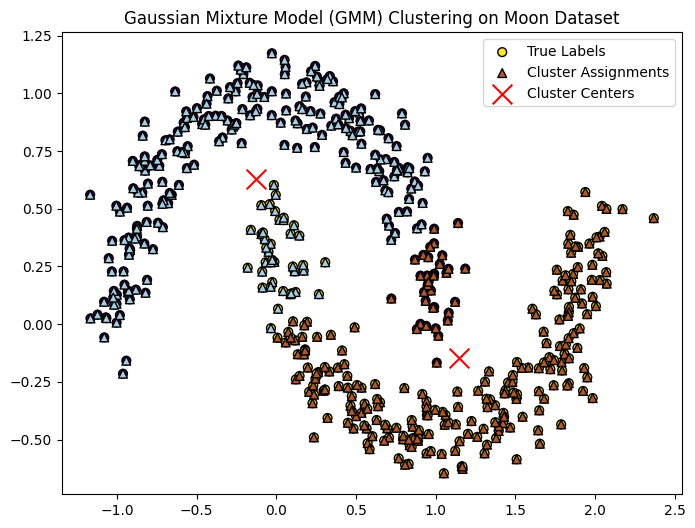

Homogeneity Score: 0.4058086567335598
Completeness Score: 0.4059773549675845
V-Measure Score: 0.40589298832188



In [71]:
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Generate moon dataset
X, labels_true = make_moons(n_samples=500, noise=0.1)

# Apply Gaussian Mixture Model (GMM) algorithm
n_components = 2

gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X)
labels_pred = gmm.predict(X)

# Plot the results
plt.figure(figsize=(8, 6))

# Plot the original dataset
plt.scatter(X[:, 0], X[:, 1], c=labels_true, cmap='viridis', edgecolors='k', s=40, marker='o', label='True Labels')

# Plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=labels_pred, cmap='Paired', edgecolors='k', s=40, marker='^', label='Cluster Assignments')

# Plot the cluster centers
centers = np.array(gmm.means_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')

plt.title('Gaussian Mixture Model (GMM) Clustering on Moon Dataset')
plt.legend()
plt.show()

homogeneity = homogeneity_score(labels_true, labels_pred)
completeness = completeness_score(labels_true, labels_pred)
v_measure = v_measure_score(labels_true, labels_pred)

print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-Measure Score: {v_measure}\n")


**2 - K-means attempts to minimize the total squared error, while k-medoids minimize the sum of dissimilarities between points labeled to be in a cluster and a point designated as the center of that cluster. In contrast to the k-means
algorithm, k -medoids choose data points as centers (medoids or exemplars).
Compare, qualitatively and quantitatively, the results of k-means and k-medoid
when applied to the blobs dataset.**


In [76]:
pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.5 MB/s eta 0:00:00


In [77]:
from sklearn.datasets import make_moons
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

In [78]:
X, labels_true = make_moons(n_samples=500, noise=0.1)

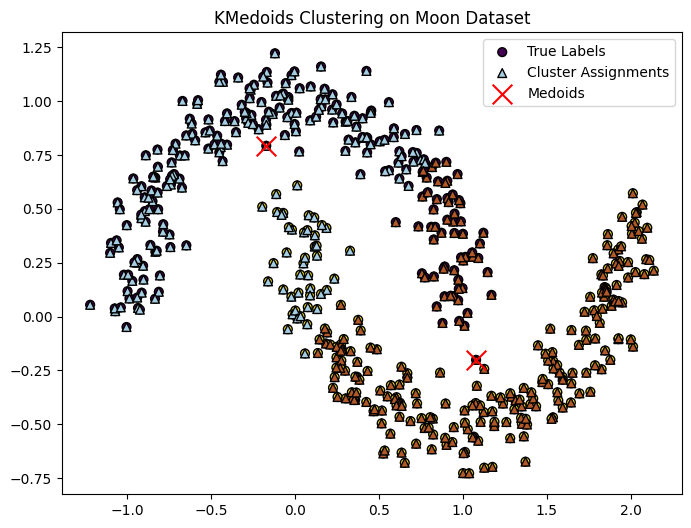

Homogeneity Score: 0.0043527489120897146
Completeness Score: 0.004023873013019748
V-Measure Score: 0.004181854937801791



In [80]:
k = 2

kmedoids = KMedoids(n_clusters=k, random_state=42)
labels_kmedoids = kmedoids.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))

# Plot the original dataset
plt.scatter(X[:, 0], X[:, 1], c=labels_true, cmap='viridis', edgecolors='k', s=40, marker='o', label='True Labels')

# Plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=labels_kmedoids, cmap='Paired', edgecolors='k', s=40, marker='^', label='Cluster Assignments')

# Plot the cluster centers (medoids)
medoids_indices = kmedoids.medoid_indices_
medoids = X[medoids_indices, :]
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x', s=200, label='Medoids')

plt.title('KMedoids Clustering on Moon Dataset')
plt.legend()
plt.show()


homogeneity = homogeneity_score(labels_true, labels_pred)
completeness = completeness_score(labels_true, labels_pred)
v_measure = v_measure_score(labels_true, labels_pred)

print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-Measure Score: {v_measure}\n")


**3- Write a Python program that takes your own color image as input and segments
the image into a) K = 2, b) K = 5 and c) K = 10 clusters using K-mean
clustering. Display the resulting images. Discuss your observation about both
images. You might need to hand this ToDo in the next lab.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K-Means Segmentation (k=10)')

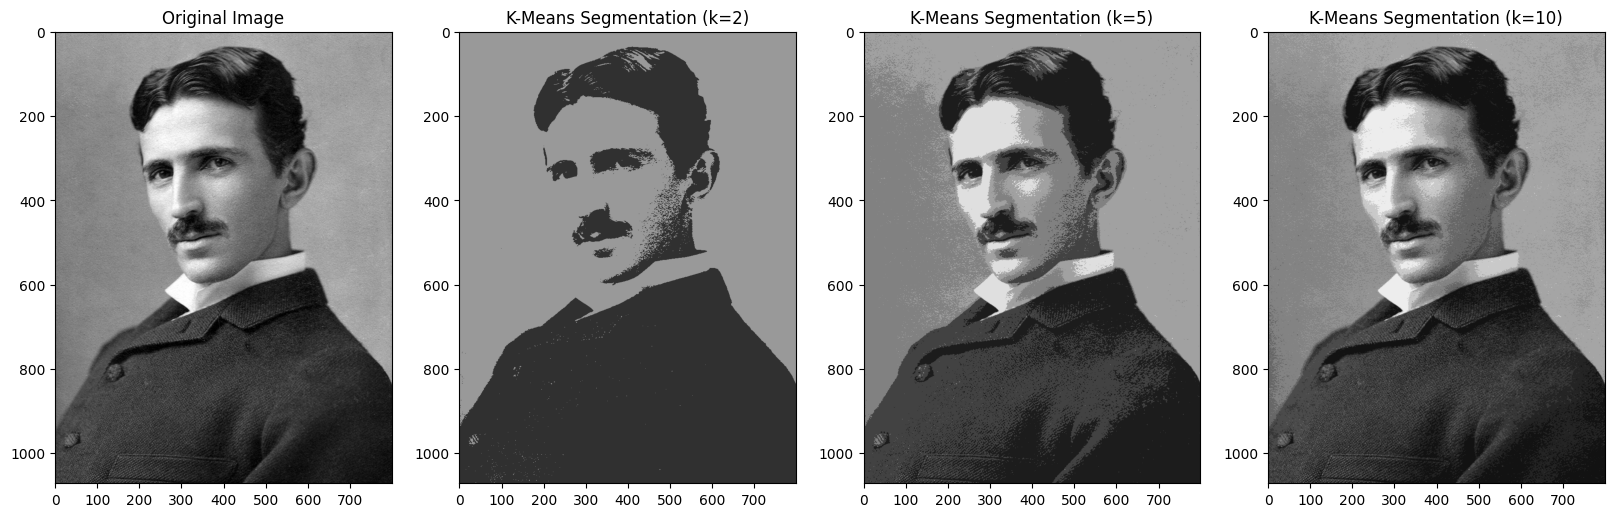

In [14]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flatten the image to be a list of RGB pixels
pixels = image.reshape((-1, 3))

# Apply K-means clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixels)
# Replace pixel values with cluster centers
segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape)
# Display the original and segmented images
plt.figure(figsize=(20, 20))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original gray scale image')

# Segmented Image
plt.subplot(1, 4, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title(f'K-Means Segmentation (k={k})')

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixels)

# Replace pixel values with cluster centers
segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape)


plt.subplot(1, 4, 3)
plt.imshow(segmented_image.astype(np.uint8))
plt.title(f'K-Means Segmentation (k={k})')


k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixels)

# Replace pixel values with cluster centers
segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape)


plt.subplot(1, 4, 4)
plt.imshow(segmented_image.astype(np.uint8))
plt.title(f'K-Means Segmentation (k={k})')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Text(0.5, 1.0, 'K-Means Segmentation (k=10)')

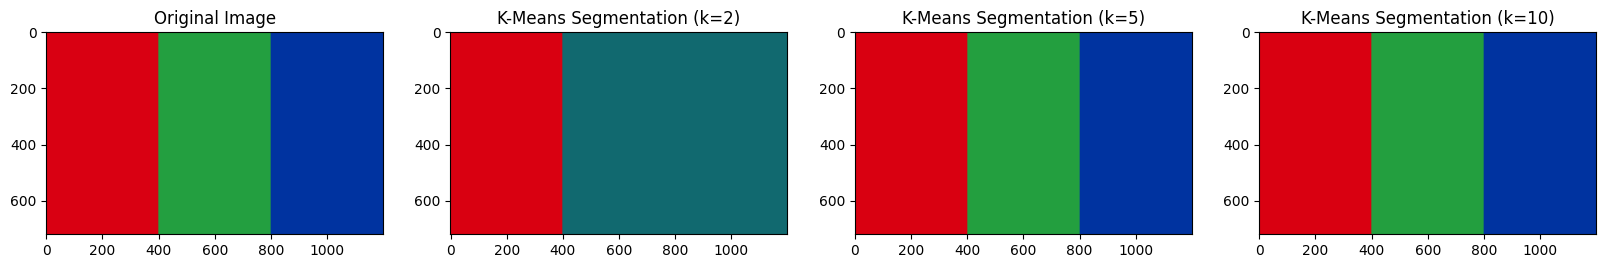

In [16]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('colors.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flatten the image to be a list of RGB pixels
pixels = image.reshape((-1, 3))

# Apply K-means clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixels)
# Replace pixel values with cluster centers
segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape)
# Display the original and segmented images
plt.figure(figsize=(20, 20))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original distinct RGB image')

# Segmented Image
plt.subplot(1, 4, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title(f'K-Means Segmentation (k={k})')

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixels)

# Replace pixel values with cluster centers
segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape)


plt.subplot(1, 4, 3)
plt.imshow(segmented_image.astype(np.uint8))
plt.title(f'K-Means Segmentation (k={k})')


k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixels)

# Replace pixel values with cluster centers
segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape)


plt.subplot(1, 4, 4)
plt.imshow(segmented_image.astype(np.uint8))
plt.title(f'K-Means Segmentation (k={k})')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K-Means Segmentation (k=100)')

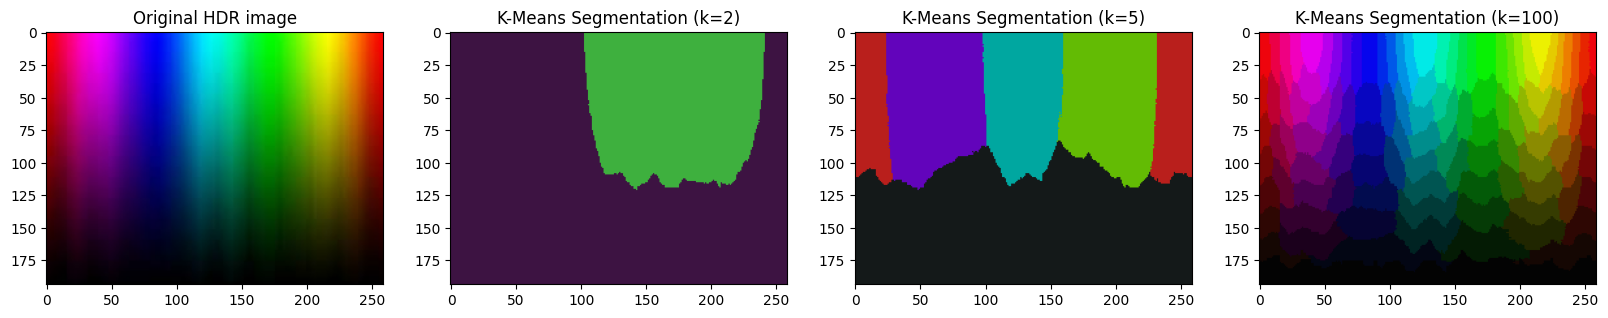

In [18]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('images.jfif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flatten the image to be a list of RGB pixels
pixels = image.reshape((-1, 3))

# Apply K-means clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixels)
# Replace pixel values with cluster centers
segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape)
# Display the original and segmented images
plt.figure(figsize=(20, 20))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original HDR image')

# Segmented Image
plt.subplot(1, 4, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title(f'K-Means Segmentation (k={k})')

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixels)

# Replace pixel values with cluster centers
segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape)


plt.subplot(1, 4, 3)
plt.imshow(segmented_image.astype(np.uint8))
plt.title(f'K-Means Segmentation (k={k})')


k = 100
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixels)

# Replace pixel values with cluster centers
segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape)


plt.subplot(1, 4, 4)
plt.imshow(segmented_image.astype(np.uint8))
plt.title(f'K-Means Segmentation (k={k})')